In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('winequality.csv')
print(df.head())


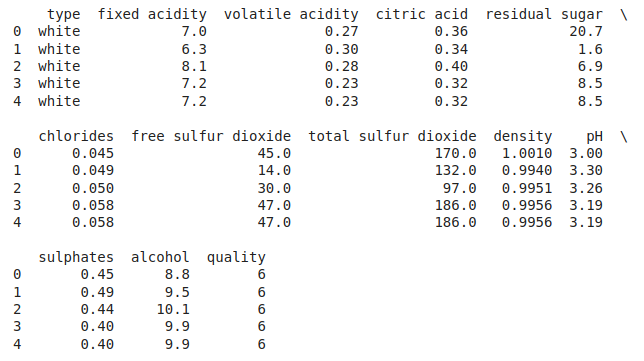

In [ ]:
df.info()


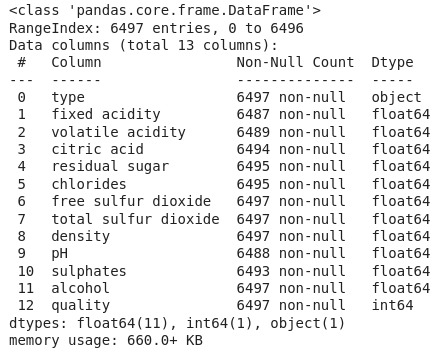

In [ ]:
df.describe().T


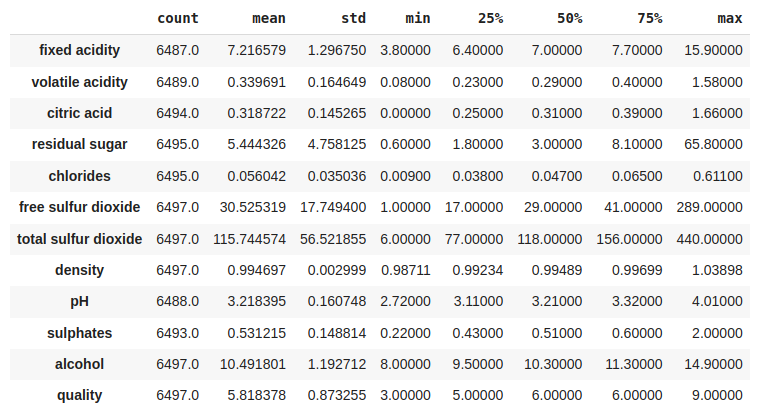

In [ ]:
df.isnull().sum()


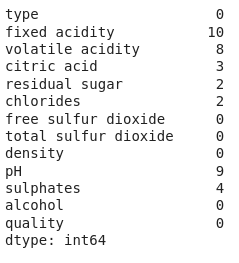

In [ ]:
for col in df.columns:
if df[col].isnull().sum() > 0:
	df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


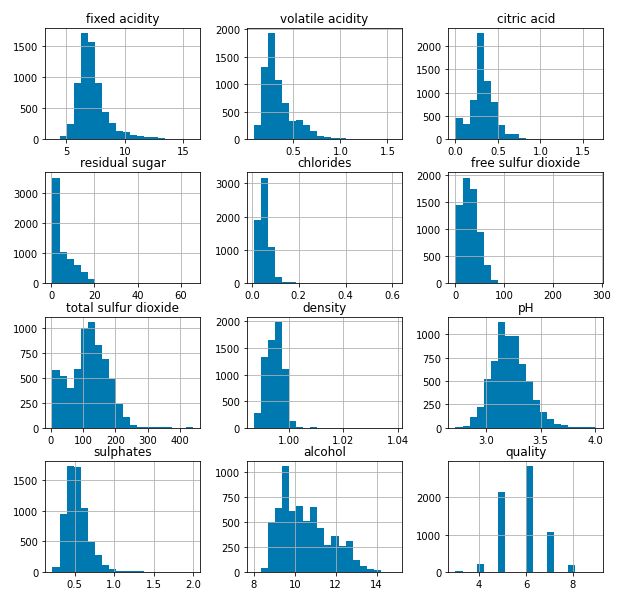

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


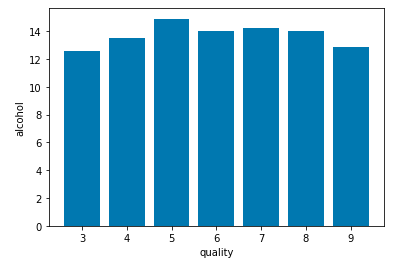

In [ ]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


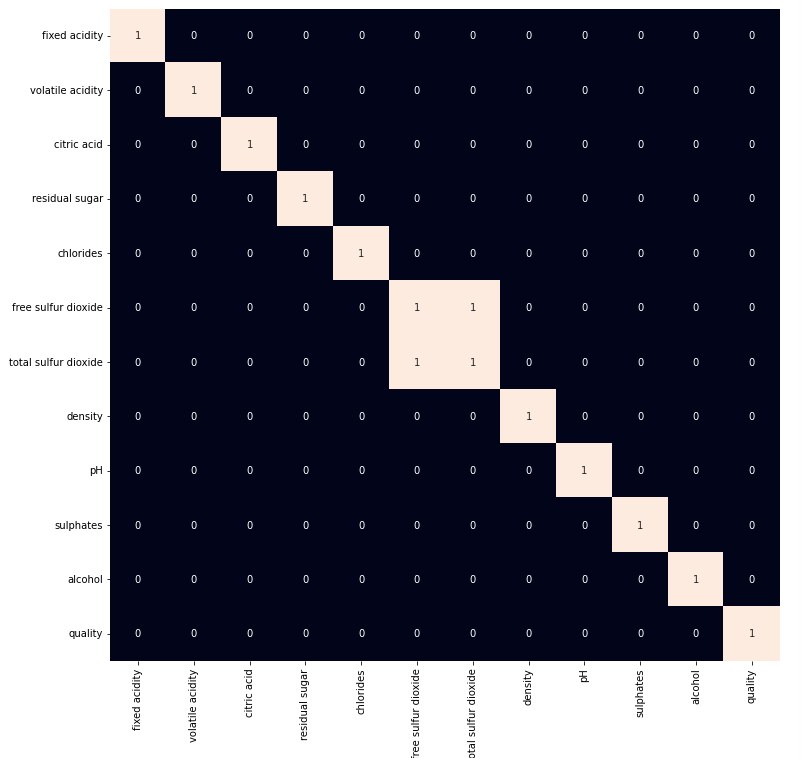

In [ ]:
df = df.drop('total sulfur dioxide', axis=1)


In [ ]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


In [ ]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((5197,11),(1300,11))

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
	models[i].fit(xtrain, ytrain)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
	print('Validation Accuracy : ', metrics.roc_auc_score(
		ytest, models[i].predict(xtest)))
	print()


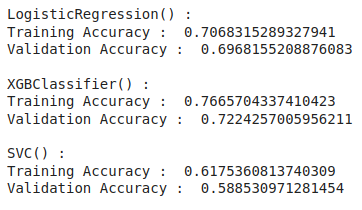

In [ ]:
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()


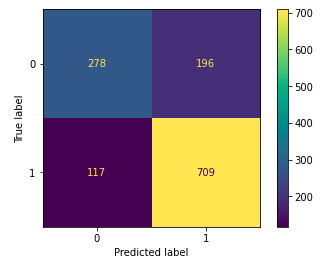

In [ ]:
print(metrics.classification_report(ytest,
									models[1].predict(xtest)))


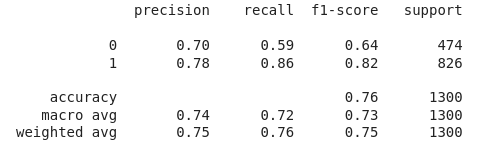